In [2]:
#Step1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [4]:
#Step2: Load time series data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url,parse_dates=['Month'],index_col='Month')
df.columns = ['Passengers']
df.head()

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

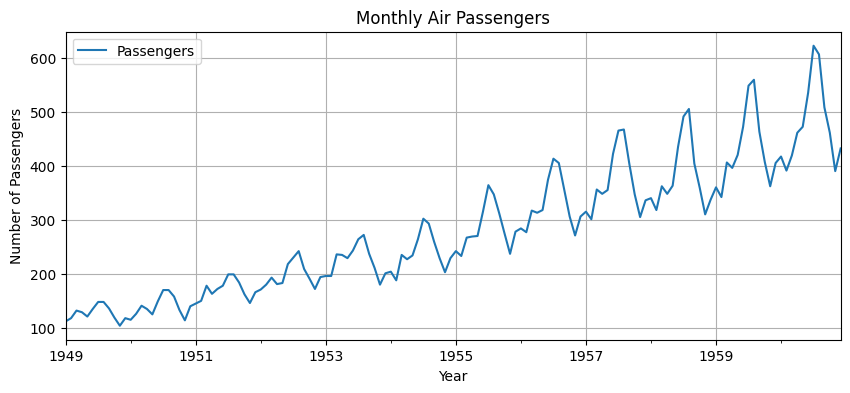

In [5]:
#Step3:Plot the time series
df.plot(title='Monthly Air Passengers', figsize=(10,4))
plt.ylabel('Number of Passengers')
plt.xlabel('Year')
plt.grid()
plt.show()

In [6]:
#Step4: Test for stationarity (ADF test)
def test_stationarity(series):
  result = adfuller(series)
  print(f'ADF Statistic : {result[0]:.4f}')
  print(f'p-value : {result[1]:.4f}')
  if result[1] <= 0.05:
    print("Stationary")
  else:
    print("Not Stationary")
test_stationarity(df['Passengers'])

ADF Statistic : 0.8154
p-value : 0.9919
Not Stationary


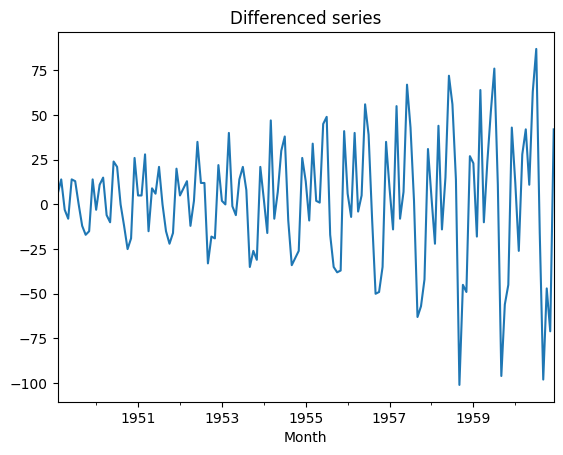

ADF Statistic : -2.8293
p-value : 0.0542
Not Stationary


In [7]:
#Step5:Make stationary(Differencing)
df_diff = df['Passengers'].diff().dropna()
df_diff.plot(title='Differenced series')
plt.show()
test_stationarity(df_diff)

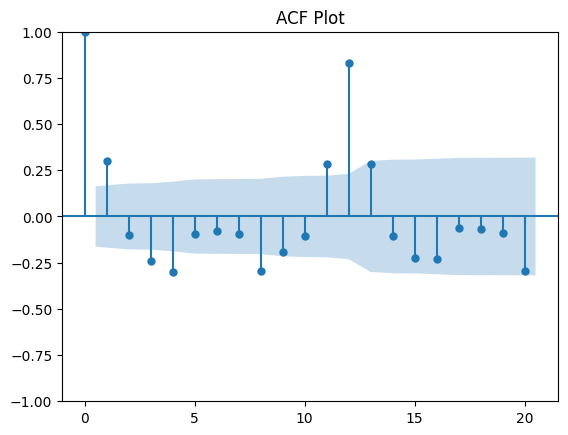

In [8]:
#Step6 :Plot ACF and PACF
plot_acf(df_diff,lags = 20)
plt.title('ACF Plot')
plt.show()

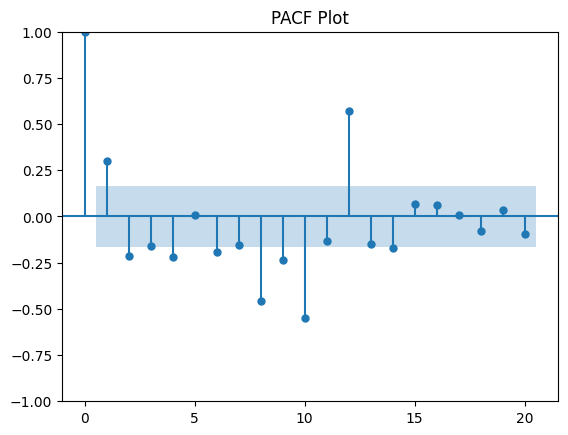

In [9]:
plot_pacf(df_diff,lags = 20)
plt.title('PACF Plot')
plt.show()

In [10]:
#Step7 :Fit ARIMA model
model = ARIMA(df['Passengers'],order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Sun, 21 Sep 2025   AIC                           1353.347
Time:                        17:30:29   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.060      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.814      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


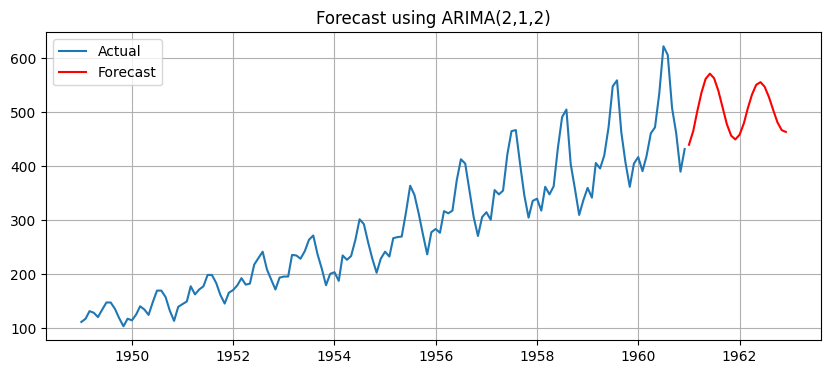

In [11]:
#Step8: Forecast and plot
#Forecast next 24 months
forecast = model_fit.forecast(steps=24)
forecast.index = pd.date_range(start=df.index[-1]+ pd.DateOffset(months=1),periods=24,freq='MS')

#Plot actual and forecast
plt.figure(figsize=(10,4))
plt.plot(df['Passengers'],label='Actual')
plt.plot(forecast,label='Forecast',color='red')
plt.title('Forecast using ARIMA(2,1,2)')
plt.legend()
plt.grid()
plt.show()

In [12]:
#Step9: Evaluate forecast(train/test)
train = df['Passengers'][:-24]
test = df['Passengers'][-24:]
model = ARIMA(train,order=(2,1,2))
model_fit = model.fit()
preds = model_fit.forecast(steps=24)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [13]:
#evaluate
mse = mean_squared_error(test,preds)
print(f'Mean squared error:{mse:.2f}')


Mean squared error:8225.46


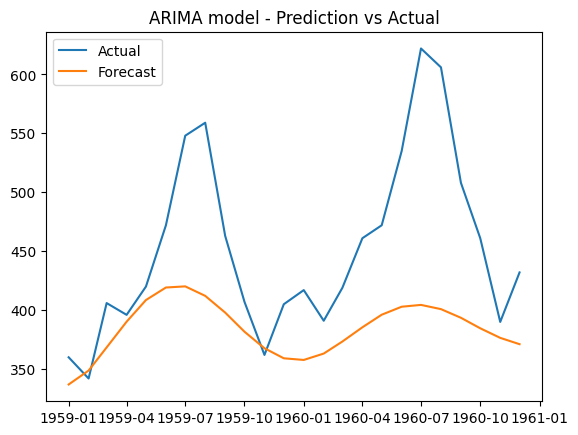

In [14]:
#plot
plt.plot(test.index,test.values,label='Actual')
plt.plot(test.index,preds.values,label='Forecast')
plt.title('ARIMA model - Prediction vs Actual')
plt.legend()
plt.show()

Simple Linear Regression

In [15]:
import pandas as pd
dataset = pd.read_csv("salary_data.csv")
print(dataset)

    YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872


In [16]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [17]:
#spliting dataset into training and test st
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=0)

In [18]:
#Fitting simple linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [19]:
#Prediction of testset result
y_pred = regressor.predict(x_test)
x_pred = regressor.predict(x_train)
print(x_pred)

[ 53919.42532909  74480.49870396  56723.20806202  68872.93323808
 103452.92027763  90368.60085726  38965.91742009 124948.58789682
  54854.0195734   47377.2656189   81957.25265845  82891.84690277
  61396.17928358  56723.20806202 110929.67423213  45508.07713028
  37096.72893147  93172.3835902   72611.31021533  64199.96201652]


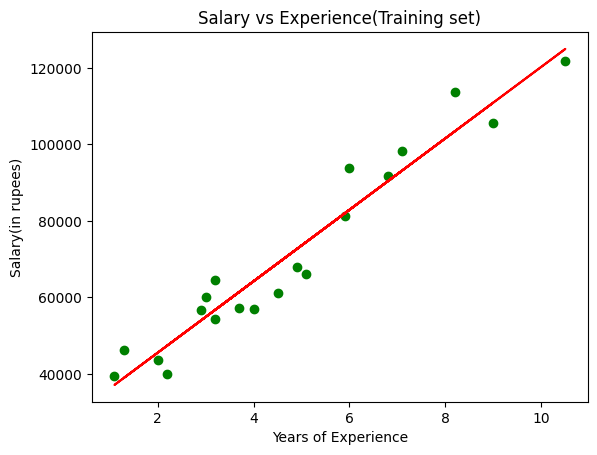

In [20]:
#visualizing traimning set
plt.scatter(x_train,y_train,color='green')
plt.plot(x_train,x_pred,color='red')
plt.title('Salary vs Experience(Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary(in rupees)')
plt.show()